In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('zillow_clean.csv')

In [19]:
df.head()

,price,bedrooms,bathrooms,floorsize,city,zipcode
0,843900,2,3,1351,LosAngeles,90025
1,303900,2,1,861,SanDiego,92173
2,824900,2,2,1324,LosAngeles,90025
3,637900,3,2,1242,SolanaBeach,92075
4,319900,1,1,609,SanDiego,92104


In [20]:
#check properties distribution accross locations
df.city.value_counts()

SanFrancisco    76
SanDiego        63
LosAngeles      62
Irvine          24
LongBeach       18
                ..
Ione             1
Denair           1
LagunaBeach      1
PennValley       1
Oakdale          1
Name: city, Length: 214, dtype: int64

In [21]:
df.zipcode.value_counts()

92637    14
94115    12
92101    10
90069     9
92115     9
         ..
90603     1
92507     1
95128     1
91722     1
95336     1
Name: zipcode, Length: 395, dtype: int64

In [16]:
#check properties distribution according to number of bd and ba
df.bedrooms.value_counts()

2    409
3    220
1    113
4     35
0      8
5      2
6      1
Name: bedrooms, dtype: int64

In [17]:
df.bathrooms.value_counts()

2    441
1    184
3    143
4     17
8      1
6      1
5      1
Name: bathrooms, dtype: int64

In [22]:
df.describe()

,price,bedrooms,bathrooms,floorsize,zipcode
count,7.880000e+02,788.000000,788.000000,788.000000,788.000000
mean,6.450581e+05,2.217005,2.007614,1204.247462,92624.383249
std,1.534409e+06,0.798579,0.761155,557.429756,1593.927197
min,7.700000e+04,0.000000,1.000000,378.000000,90005.000000
25%,3.390000e+05,2.000000,2.000000,894.750000,91702.000000
50%,4.499000e+05,2.000000,2.000000,1114.500000,92366.000000
75%,6.390000e+05,3.000000,2.000000,1401.000000,94107.000000
max,2.700000e+07,6.000000,8.000000,9290.000000,96150.000000


In [23]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floorsize', 'city', 'zipcode'], dtype='object')

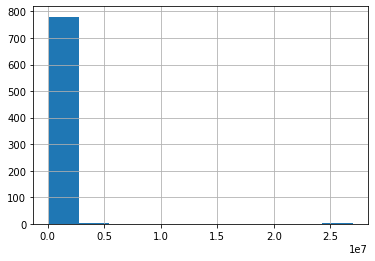

In [24]:
#exploring data using histograms
df.price.hist()

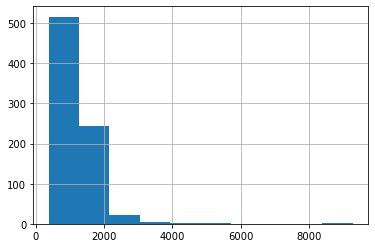

In [25]:
df.floorsize.hist()

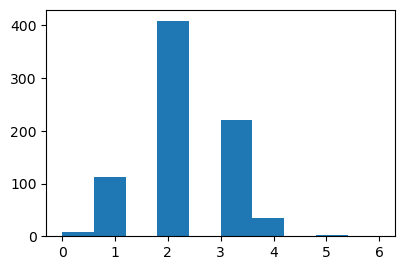

In [83]:
plt.rcParams['figure.figsize'] = [4.5, 3]
plt.rcParams['figure.dpi'] = 100
plt.hist(x=df['bedrooms'])
plt.show()

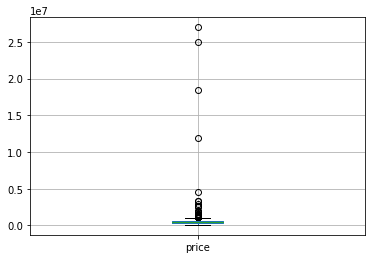

In [30]:
#exploring data using boxplots
df.boxplot(column=['price'])

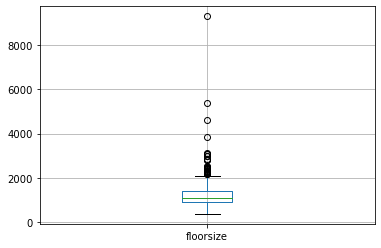

In [31]:
df.boxplot(column=['floorsize'])

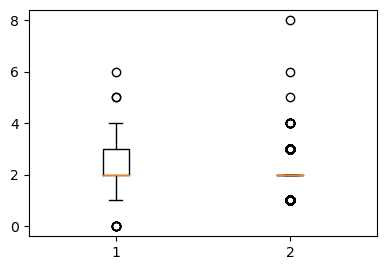

In [86]:
plt.boxplot(x=[df['bedrooms'], df['bathrooms']])
plt.show()

In [43]:
#correlation between different variables
df[['price', 'bedrooms', 'bathrooms', 'floorsize']].corr()

,price,bedrooms,bathrooms,floorsize
price,1.000000,0.161450,0.363548,0.663120
bedrooms,0.161450,1.000000,0.639038,0.615925
bathrooms,0.363548,0.639038,1.000000,0.744340
floorsize,0.663120,0.615925,0.744340,1.000000


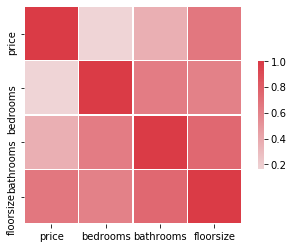

In [44]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['price', 'bedrooms', 'bathrooms', 'floorsize']].corr(), vmax=1, center=0, cmap=cmap, square=True
            , linewidths=.5, cbar_kws={'shrink':.5})

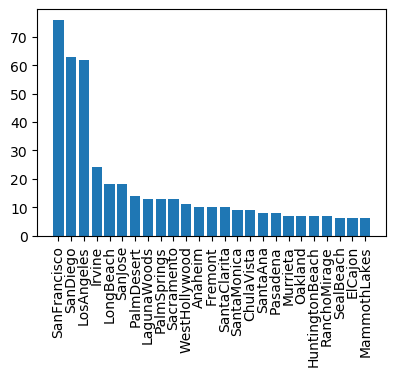

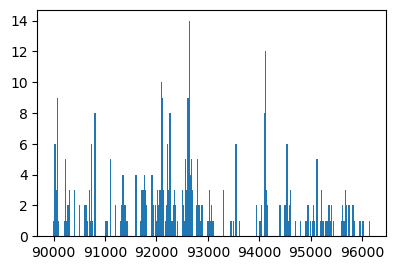

In [104]:
#plotting categorical variables
plt.rcParams['figure.figsize'] = [4.5, 3]
plt.rcParams['figure.dpi'] = 100
plt.xticks(rotation=90)
plt.bar(x=df['city'].value_counts()[:25].index, height=df['city'].value_counts()[:25])
plt.show()
plt.bar(x=df['zipcode'].value_counts().index, height=df['zipcode'].value_counts(), width=25)
plt.show()

In [105]:
#making some pivot tables to get a more comprehensive understanding of how prices vary according to other variables
pd.pivot_table(df, index='bedrooms', values='price')

,price
bedrooms,
0,3.445395e+05
1,4.332741e+05
2,5.346153e+05
3,7.177936e+05
4,2.236982e+06
5,4.619500e+05
6,7.990000e+05


In [106]:
pd.pivot_table(df, index='bathrooms', values='price')

,price
bathrooms,
1,4.489241e+05
2,5.300032e+05
3,6.725187e+05
4,3.288069e+06
5,9.550000e+05
6,1.195000e+07
8,2.700000e+07


In [121]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df[df.bedrooms==2], index='city', values='price').sort_values('price', ascending=False)

,price
city,
Malibu,2.937500e+06
Carpinteria,1.495000e+06
BeverlyHills,1.285000e+06
SantaMonica,1.107143e+06
SanFrancisco,1.033180e+06
Aptos,9.980000e+05
MountainView,9.480000e+05
FosterCity,9.439440e+05
WestHollywood,8.744988e+05


In [126]:
pd.pivot_table(df[(900<df.floorsize) & (df.floorsize<1100)], index='city', values='price').sort_values('price', ascending=False)

,price
city,
Carpinteria,1.495000e+06
SanFrancisco,1.008818e+06
SantaMonica,7.925000e+05
WestHollywood,6.999950e+05
FosterCity,6.998880e+05
SantaBarbara,6.420000e+05
Fremont,6.288693e+05
CulverCity,6.244950e+05
SanJose,5.995676e+05
